In [1]:
# 1. Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Load dataset
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\1 Price elasticity & demand forecasting\3 Multiple linear regression\MLR_dataset.csv")  # Make sure the file is in the same directory or use full path

In [3]:
df.head()

,price,demand,competitor_price,economic_index,seasonality,promotion
0,27.860363,437.086107,21.813837,0.919620,0.000000,0
1,54.046763,955.642876,19.981044,1.058699,0.015710,0
2,48.078309,758.794548,12.926926,1.130828,0.031419,0
3,35.396751,638.792636,32.327000,0.877608,0.047128,0
4,18.166040,240.416776,26.448087,1.171631,0.062836,0


In [4]:
# 3. Define features and target
X = df.drop("price", axis=1)  # Independent variables
y = df["price"]               # Target variable

In [5]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# 6. Predict on test data
y_pred = model.predict(X_test)

In [8]:
# 7. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
# 8. Show coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print("\n🔍 Feature Impact (Coefficients):\n", coefficients)
print(f"\n📊 Model Performance:\nMSE = {mse:.2f}\nR² = {r2:.4f}")


🔍 Feature Impact (Coefficients):
             Feature  Coefficient
0            demand     0.049995
1  competitor_price    -0.301405
2    economic_index     2.089860
3       seasonality     3.003619
4         promotion    -4.027607

📊 Model Performance:
MSE = 1.02
R² = 0.9965


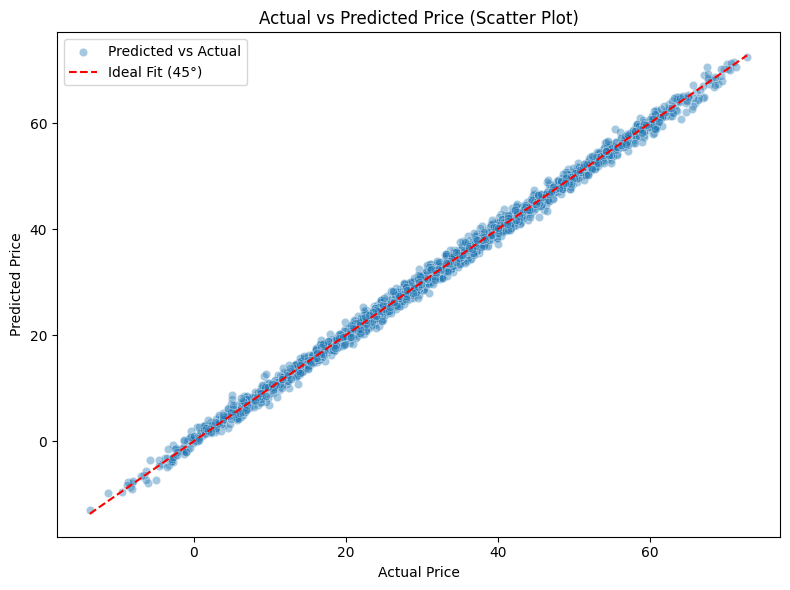

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit (45°)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Scatter Plot)")
plt.legend()
plt.tight_layout()
plt.show()




Points above the line:
Predicted > Actual
The model thinks the value is higher than it truly is.
👉 Overestimation

Points below the line:
Predicted < Actual
The model thinks the value is lower than it actually is.
👉 Underestimation